# Widget Stuff

Latest function:

<IPython.core.display.Javascript object>


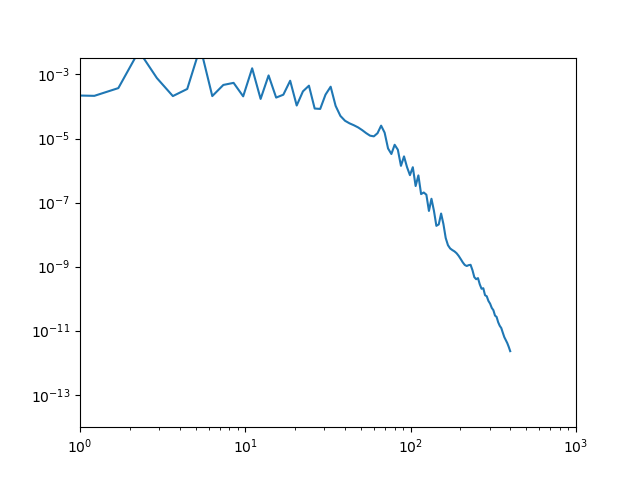

interactive(children=(FloatSlider(value=5.4, description='G_ee', max=16.200000000000003, min=-5.4), FloatSlide…

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt3 import Rowe2015Model
#Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        #freqs = np.linspace(0.001,500, num=50)
        freqs = np.linspace(0.1,20,num=100)**2
        
        mod = Rowe2015Model()#freqs=freqs)
        #mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_P_EEG(freqs)#vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        
        #ax.set_ylim([0.00001,100.])
        #ax.set_ylim([10E-1, 10E2])

        ax.set_xlim([10E-1, 10E2]) # 0,100])

        ax.semilogx()
        ax.semilogy()

        def update_widget(G_ee = 5.4,
                          G_ei = -7.,
                          G_ese = 5.6,
                          G_esre = -2.8,G_srs = -0.6,alpha = 75, #s^-1
                          beta = 75*3.8 ,
                          t0 = 84, # ms
                          A_EMG = 0.5E-12, #s^-1
                          f_EMG = 40):
            
            #mod = Rowe2004Model_2(freqs=freqs)
            mod = Rowe2015Model()
            
            #freqs=freqs)
                    
            # Variable parameters
            mod.G_ee = G_ee
            mod.G_ei = G_ei
            mod.G_ese = G_ese
            mod.G_esre = G_esre
            mod.G_srs = G_srs
        
            mod.alpha = alpha
            mod.beta = beta
            mod.t0 = t0
            mod.A_EMG = A_EMG
            mod.f_EMG = f_EMG
            
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_P_EEG(freqs)#vector_P_EEG()

            #x = x*scale
            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-2,10E1]) # 0,100])
            
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

        interact(update_widget,continuous_update=False)
            

anf2 = anewfig2()

anf2.plot_widget()

Update: this might be working now:

***observations:***
    
- `G_ei` is a magic number. Vvalues around -0.1 seem to give nice peak structures
- The peaks are still about an order of magnitude off. They should be around 10Hz
- We don't know what the correct value of `G_ie` is. Have tried some whacky options for that. 
- Have added in an exploratory 'scale' parameter. 
- Need to tell the widgets ranges and get them to not compute every point 

---

alternative with `interactive_output`

In [2]:
from ipywidgets import *

In [6]:
from ipywidgets import IntSlider,interactive_output,HBox
from IPython.display import display

In [12]:
a = IntSlider()
b = IntSlider()
c = IntSlider()

ui = HBox([a,b,c])

def f(a,b,c):
    print ((a,b,c))
    
out = interactive_output(f, {'a': a, 'b': b, 'c': c})#,continuous_update=False)

display(ui,out)

Output()

<IPython.core.display.Javascript object>


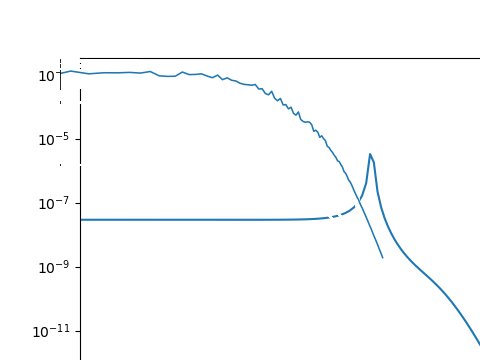

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt3 import Rowe2015Model
#Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        #freqs = np.linspace(0.001,500, num=50)
        freqs = np.linspace(0.1,20,num=100)**2
        
        mod = Rowe2015Model()#freqs=freqs)
        #mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_P_EEG(freqs)#vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        
        #ax.set_ylim([0.00001,100.])
        #ax.set_ylim([10E-1, 10E2])

        ax.set_xlim([10E-1, 10E2]) # 0,100])

        ax.semilogx()
        ax.semilogy()

        def update_widget(G_ee = 5.4,
                          G_ei = -7.,
                          G_ese = 5.6,
                          G_esre = -2.8,G_srs = -0.6,alpha = 75, #s^-1
                          beta = 75*3.8 ,
                          t0 = 84, # ms
                          A_EMG = 0.5E-12, #s^-1
                          f_EMG = 40):
            
            #mod = Rowe2004Model_2(freqs=freqs)
            mod = Rowe2015Model()
            
            #freqs=freqs)
                    
            # Variable parameters
            mod.G_ee = G_ee
            mod.G_ei = G_ei
            mod.G_ese = G_ese
            mod.G_esre = G_esre
            mod.G_srs = G_srs
        
            mod.alpha = alpha
            mod.beta = beta
            mod.t0 = t0
            mod.A_EMG = A_EMG
            mod.f_EMG = f_EMG
            
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_P_EEG(freqs)#vector_P_EEG()

            #x = x*scale
            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-2,10E1]) # 0,100])
            
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

                                          
        G_ee_w = IntSlider()
        G_ei_w = IntSlider()
        G_ese_w = IntSlider()
        t0_w = IntSlider()

        out = interactive_output(update_widget,{'G_ee': G_ee_w, 'G_ei': G_ei_w,
                                                'G_ese': G_ese_w, 't0': t0_w})
        
        ui = HBox([G_ee_w,G_ei_w,G_ese_w,G_ese_w,t0_w])
        

        #out = interactive_output(f, {'a': a, 'b': b, 'c': c})#,continuous_update=False)

        #display(ui,out)
        display(ui)       
                                          

anf2 = anewfig2()

anf2.plot_widget()

---

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt3 import Rowe2015Model
#Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        #freqs = np.linspace(0.001,500, num=50)
        freqs = np.linspace(0.1,20,num=100)**2
        
        mod = Rowe2015Model()#freqs=freqs)
        #mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_P_EEG(freqs)#vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        
        #ax.set_ylim([0.00001,100.])
        #ax.set_ylim([10E-1, 10E2])

        ax.set_xlim([10E-1, 10E2]) # 0,100])

        ax.semilogx()
        ax.semilogy()

        def update_widget(G_ee = 5.4,
                          G_ei = -7.,
                          G_ese = 5.6,
                          G_esre = -2.8,G_srs = -0.6,alpha = 75, #s^-1
                          beta = 75*3.8 ,
                          t0 = 84, # ms
                          A_EMG = 0.5E-12, #s^-1
                          f_EMG = 40):
            
            #mod = Rowe2004Model_2(freqs=freqs)
            mod = Rowe2015Model()
            
            #freqs=freqs)
                    
            # Variable parameters
            mod.G_ee = G_ee
            mod.G_ei = G_ei
            mod.G_ese = G_ese
            mod.G_esre = G_esre
            mod.G_srs = G_srs
        
            mod.alpha = alpha
            mod.beta = beta
            mod.t0 = t0
            mod.A_EMG = A_EMG
            mod.f_EMG = f_EMG
            
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_P_EEG(freqs)#vector_P_EEG()

            #x = x*scale
            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-2,10E1]) # 0,100])
            
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

        interact(update_widget)
            

anf2 = anewfig2()

anf2.plot_widget()

<IPython.core.display.Javascript object>


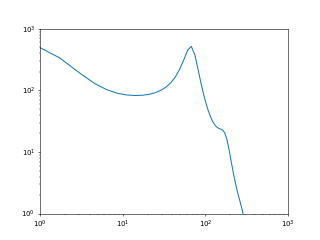

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTFlLTE0LCBkZXNjcmlwdGlvbj11J0dfaWUnLCBtYXg9M2UtMTQsIG1pbj0tMWUtMTQpLCBGbG9hdFNsaWRlcih2YWx1ZT3igKY=


In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt2 import Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        #freqs = np.linspace(0.001,500, num=50)
        freqs = np.linspace(0.1,20,num=50)**2

        mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        
        #ax.set_ylim([0.00001,100.])
        ax.set_ylim([10E-1, 10E2])

        ax.set_xlim([10E-1, 10E2]) # 0,100])

        ax.semilogx()
        ax.semilogy()

        def update_widget(G_ie = 10E-15, # THIS IS A RANDOM CHOICE   # G_ie = 1 
                          G_ei = -0.1, # THIS GIVES GOOD PATTERNS    # G_ei = -8
                          scale=1, # 0.001, # PLAYING AROUND WITH THIS
                          alpha=88.0, gamma=71.8, t_0=79.2, 
                          G_ee=3.8, G_ese=10.8,
                          G_esre=-5.7, G_srs=-0.34, p_0=2.94, r_e=80.0):
            
            
            mod = Rowe2004Model_2(freqs=freqs)
            
            mod.alpha
            #phi_n=phi_n,
            mod.alpha=alpha
            mod.gamma=gamma
            mod.t_0=t_0
            mod.G_ee=G_ee
            mod.G_ei=G_ei
            mod.G_ese=G_ese
            mod.G_esre=G_esre
            mod.G_srs=G_srs
            mod.p_0=p_0
            mod.r_e=r_e / 100.

            
            mod.G_ie = G_ie
            
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_vector_P_EEG()

            x = x*scale
            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-1,10E1]) # 0,100])
            
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

        interact(update_widget)
            

anf2 = anewfig2()

anf2.plot_widget()

In [ ]:
G_ei = -1.5

In [37]:
mod = Rowe2004Model_2(freqs)

In [38]:
mod.compute_P_EEG(freqs).shape

(50,)

In [39]:
mod.compute_P_EEG(freqs)

array([1.23813651e+18, 4.07216769e+10, 5.25841917e+09, 1.35388865e+09,
       4.98782561e+08, 2.29020896e+08, 1.21688910e+08, 7.16310510e+07,
       4.54613099e+07, 3.05639134e+07, 2.15092477e+07, 1.57134341e+07,
       1.18450030e+07, 9.17232303e+06, 7.27158718e+06, 5.88625978e+06,
       4.85517488e+06, 4.07381081e+06, 3.47249468e+06, 3.00366093e+06,
       2.63415285e+06, 2.34043440e+06, 2.10553517e+06, 1.91705635e+06,
       1.76584240e+06, 1.64507939e+06, 1.54967139e+06, 1.47579950e+06,
       1.42059943e+06, 1.38191108e+06, 1.35806147e+06, 1.34764261e+06,
       1.34924119e+06, 1.36107034e+06, 1.38046117e+06, 1.40322737e+06,
       1.42308043e+06, 1.43158115e+06, 1.41938536e+06, 1.37917249e+06,
       1.30910091e+06, 1.21408948e+06, 1.10338032e+06, 9.86340546e+05,
       8.69809650e+05, 7.57996392e+05, 6.53551408e+05, 5.58352507e+05,
       4.73654597e+05, 3.99976746e+05])

In [33]:
mod.compute_P_EEG(30)

5435227.518685326

---

***Abeysuria model from daniel:***

In [35]:
from rowe_model_opt3 import Rowe2015Model



In [42]:
mod = Rowe2015Model.__init__??

In [ ]:
mod = Rowe2015Model.__init__

In [ ]:
mod = Rowe2015Model.__init__

In [40]:
Rowe2015Model.compute_P_EEG??

In [50]:
mod = Rowe2015Model()

In [51]:
mod.compute_P_EEG(freqs)

array([2.40290838e-04, 1.10813529e-04, 5.25597412e-05, 6.33263289e-05,
       9.85905558e-04, 4.74944074e-05, 9.50333568e-04, 6.30973479e-05,
       5.06949079e-05, 1.01387006e-04, 2.03982370e-04, 1.84012424e-04,
       8.19783546e-05, 4.19700743e-05, 6.27166996e-05, 2.69293375e-04,
       3.47909828e-05, 1.68695970e-04, 5.77718919e-05, 2.52454149e-05,
       2.86528882e-05, 3.41373917e-05, 2.73910727e-05, 1.64134366e-05,
       1.29204213e-05, 4.05837550e-05, 1.50382825e-05, 1.07639438e-05,
       8.28911530e-06, 2.76479736e-05, 4.79820715e-06, 2.74076246e-06,
       2.13410046e-06, 1.62852090e-06, 1.36077456e-06, 2.21470013e-06,
       2.67354109e-06, 5.44446143e-07, 2.14574793e-06, 3.19802377e-07,
       4.24526842e-07, 7.92832375e-07, 3.23724761e-07, 1.85582924e-07,
       1.60510930e-07, 1.92779530e-07, 9.94211032e-08, 3.59499640e-08,
       5.99687559e-08, 2.42609345e-08])

In [54]:
mod = Rowe2015Model()

EEG = mod.compute_P_EEG(freqs)

In [56]:
df = pd.DataFrame(EEG,index=freqs)

<IPython.core.display.Javascript object>


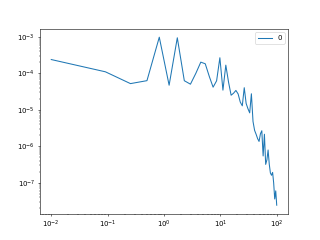

In [59]:
df.plot(logx=True,logy=True)

<IPython.core.display.Javascript object>


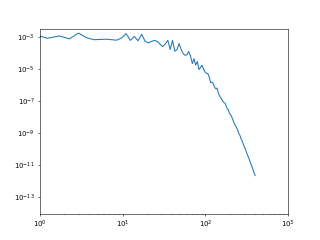

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUuNCwgZGVzY3JpcHRpb249dSdHX2VlJywgbWF4PTE2LjIwMDAwMDAwMDAwMDAwMywgbWluPS01LjQpLCBGbG9hdFNsaWTigKY=


In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
import pandas as pd

from rowe_model_opt3 import Rowe2015Model
#Rowe2004Model as Rowe2004Model_2



#mod = Rowe2004Model_2(freqs=freqs)
#EEG = mod.compute_vector_P_EEG()
#freqs = np.linspace(0.001,100,num=50)
#df_EEG = pd.DataFrame(np.squeeze(EEG))
#df_EEG.abs().plot(logx=True,logy=True)

class anewfig2(object):

    def plot_widget(self):
        
        #freqs = np.linspace(0.001,500, num=50)
        freqs = np.linspace(0.1,20,num=100)**2
        
        mod = Rowe2015Model()#freqs=freqs)
        #mod = Rowe2004Model_2(freqs=freqs)
        x = mod.compute_P_EEG(freqs)#vector_P_EEG()
        
        phi_n = mod.phi_n
        
        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        
        #ax.set_ylim([0.00001,100.])
        #ax.set_ylim([10E-1, 10E2])

        ax.set_xlim([10E-1, 10E2]) # 0,100])

        ax.semilogx()
        ax.semilogy()

        def update_widget(G_ee = 5.4,
                          G_ei = -7.,
                          G_ese = 5.6,
                          G_esre = -2.8,G_srs = -0.6,alpha = 75, #s^-1
                          beta = 75*3.8 ,
                          t0 = 84, # ms
                          A_EMG = 0.5E-12, #s^-1
                          f_EMG = 40):
            
            #mod = Rowe2004Model_2(freqs=freqs)
            mod = Rowe2015Model()
            
            #freqs=freqs)
                    
            # Variable parameters
            mod.G_ee = G_ee
            mod.G_ei = G_ei
            mod.G_ese = G_ese
            mod.G_esre = G_esre
            mod.G_srs = G_srs
        
            mod.alpha = alpha
            mod.beta = beta
            mod.t0 = t0
            mod.A_EMG = A_EMG
            mod.f_EMG = f_EMG
            
            mod.phi_n = phi_n
            
            #x = mod.compute_P_EEG() #mod.freqs)
            x = mod.compute_P_EEG(freqs)#vector_P_EEG()

            #x = x*scale
            
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([10E-2,10E1]) # 0,100])
            
            #ax.set_ylim([0.00001,10E10])# 1000.])
            ax.semilogx()
            ax.semilogy()

            

        interact(update_widget)
            

anf2 = anewfig2()

anf2.plot_widget()

---

Having trouble getting widgets to work. This is the status:

This toy example works:

In [9]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

"""
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);
""";


class afig(object):

    def plot_widget(self):

        x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(x, np.sin(x))


        def update_widget(w = 1.0):
            line.set_ydata(np.sin(w * x))
            fig.canvas.draw()


        interact(update_widget);
            

In [5]:
blah = afig()

<IPython.core.display.Javascript object>


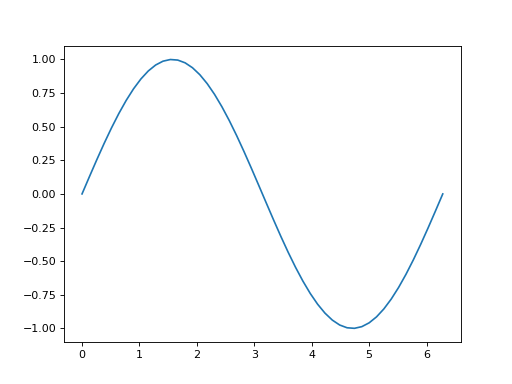

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSd3JywgbWF4PTMuMCwgbWluPS0xLjApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSfigKY=


In [6]:
blah.plot_widget()

I added something like this in `rowe_model_opt.py`:

In [10]:
from rowe_model_opt import Rowe2004Model

In [11]:
mod = Rowe2004Model(freqs = np.linspace(0.001,100, num=50))

<IPython.core.display.Javascript object>


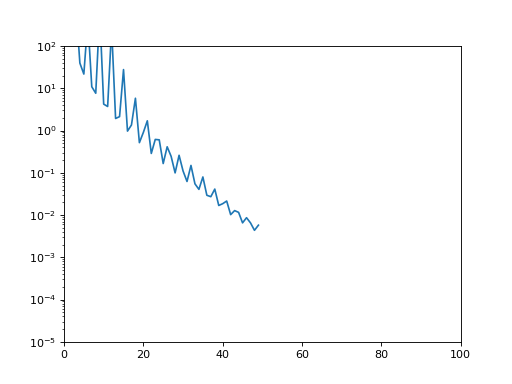

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTg4LjAsIGRlc2NyaXB0aW9uPXUnYWxwaGEnLCBtYXg9MjY0LjAsIG1pbj0tODguMCksIEZsb2F0U2xpZGVyKHZhbHVlPTfigKY=


In [12]:
mod.plot_widget()

...this doesn't seem to do the updates properly. Although I'm not sure.

This is an alternative version that mirrors directly the toy example; not trying to do it directly inside the class

In [ ]:
class anewfig(object):

    def plot_widget(self):
        
        freqs = np.linspace(0.001,100, num=50)
        mod = Rowe2004Model(freqs=freqs)        
        phi_n = mod.phi_n
        x = mod.compute_P_EEG(mod.freqs)

        #x = np.linspace(0, 2 * np.pi)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(freqs,x) #x, np.sin(x))

        #ax.set_xlim([0,100])
        #ax.set_ylim([0.00001,100.])
        #ax.semilogx()
        #ax.semilogy()

        def update_widget(alpha=88.0, gamma=71.8, t_0=79.2, 
                          G_ee=3.8, G_ei=-8.0, G_ese=10.8,
                          G_esre=-5.7, G_srs=-0.34, p_0=2.94, r_e=80.0):
            
            mod = Rowe2004Model(freqs=freqs,phi_n=phi_n,
                                alpha=alpha,gamma=gamma,t_0=t_0,
                                G_ee=G_ee,G_ei=G_ei,G_ese=G_ese,G_esre=G_esre,
                                G_srs=G_srs,p_0=p_0,r_e=r_e)
                                
            
            x = mod.compute_P_EEG(mod.freqs)
            
            line.set_ydata(x)# np.sin(w * x))
            fig.canvas.draw()
            

            #ax.set_xlim([0,100])
            #ax.set_ylim([0.00001,100.])
            #ax.semilogx()
            #ax.semilogy()

            

        interact(update_widget)
            

<IPython.core.display.Javascript object>


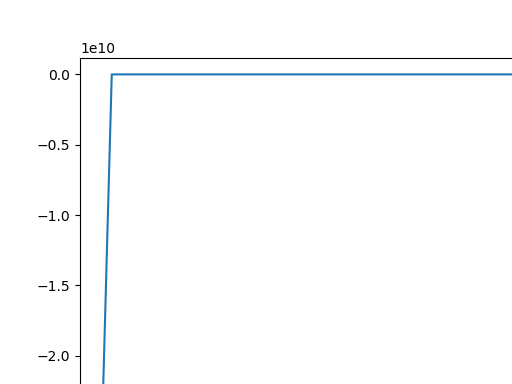

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTg4LjAsIGRlc2NyaXB0aW9uPXUnYWxwaGEnLCBtYXg9MjY0LjAsIG1pbj0tODguMCksIEZsb2F0U2xpZGVyKHZhbHVlPTfigKY=


In [14]:
anf = anewfig()

anf.plot_widget()

...but this also doesn't seem to be working. 


---